# Data Visualisation with Animation.

In [1]:
#Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from bs4 import BeautifulSoup
import requests
import csv
import json

In [2]:
#Scraping the websites and different sources using BeautifulSoup package 

url = 'https://censusindia.gov.in/Census_Data_2001/Census_data_finder/C_Series/Population_by_religious_communities.htm'

source = requests.get(url, verify=False).text

C:\Users\LENOVO\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [3]:
soup = BeautifulSoup(source, 'lxml')
print(soup.prettify())

<html xmlns="http://www.w3.org/TR/REC-html40" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:x="urn:schemas-microsoft-com:office:excel">
 <head>
  <title>
   Census Reference Tables, C-Series Population by religious communities
  </title>
  <meta content="Published B-Series Tables related to Population by religious communities, state wise religious communities, UT wise religious communities" name="description"/>
  <meta content="Census Data finder, census india, census website, census 2001, indian census, population by religious communities, religious persons, religious male, religious female, all religious communities, state wise religious population, religious population in india, hindu population in major cities, percentage of religion, muslims population in major cities, christian population in major cities, jains population in india, major religion in india, sikh population in india, state wise hind, muslims, christian, sikh, jain population, religious population in delhi

In [4]:
table = soup.find('table')

In [5]:
print(type(table))

<class 'bs4.element.Tag'>


In [6]:
rows = table.find_all('tr')

In [7]:
cols = [v.text for v in rows[1].find_all('td')]
df = pd.DataFrame(columns=cols)
df.head()

,S No.,State / UT,Religious Communities,Persons,Males,Females


In [8]:
for i in range(12, 326):
    tds = rows[i].find_all('td')
    values = [td.text for td in tds]
    df = df.append(pd.Series(values, index=cols), ignore_index=True)

In [9]:
pd.set_option('display.max_rows', 3027)
df = df.iloc[0:324, :]
df

,S No.,State / UT,Religious Communities,Persons,Males,Females
0,9,Andaman & Nicobar Islands,All Religious Communities,"356,152","192,972","163,180"
1,10,Andaman & Nicobar Islands,Hindu,"246,589","134,878","111,711"
2,11,Andaman & Nicobar Islands,Muslim,"29,265","15,736","13,529"
3,12,Andaman & Nicobar Islands,Christian,"77,178","40,529","36,649"
4,13,Andaman & Nicobar Islands,Sikh,"1,587",873,714
5,14,Andaman & Nicobar Islands,Buddhist,421,310,111
6,15,Andaman & Nicobar Islands,Jain,23,12,11
7,16,Andaman & Nicobar Islands,Other Religious Communities,238,128,110
8,,,,,,
9,17,Andhra Pradesh,All Religious Communities,"76,210,007","38,527,413","37,682,594"


### Comparing 3 states of India, namely :
#### Bihar, Maharashtra, Uttar Pradesh

In [10]:
data_bihar = df[df['State / UT'] == 'Bihar']
data_maharashtra = df[df['State / UT'] == 'Maharashtra']
data_up = df[df['State / UT'] == 'Uttar Pradesh']

In [11]:
data_bihar.drop(['S No.'], inplace=True, axis=1)
data_maharashtra.drop(['S No.'], inplace=True, axis=1)
data_up.drop(['S No.'], inplace=True, axis=1)


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data_up.reset_index(drop=True, inplace=True)
data_maharashtra.reset_index(drop=True, inplace=True)
data_bihar.reset_index(drop=True, inplace=True)

In [14]:
url1 = 'https://en.wikipedia.org/wiki/Religion_in_India'

response = requests.get(url1).text
soup1 = BeautifulSoup(response, 'lxml')
stats = soup1.find('table', class_='wikitable sortable')


In [15]:
print(type(stats))

<class 'bs4.element.Tag'>


In [16]:
col = stats.find_all('th')

for i in range(8):
    col1 = [t.text.replace('\n', '').replace('A', '').replace('% ', '').replace('[59]', '') for t in col]

In [17]:
col1 = col1[0:8]
col1

['Religiousgroup',
 'Population 1952',
 'Population 1961',
 'Population 1971',
 'Population 1981',
 'Population 1991',
 'Population 2001',
 'Population 2011']

In [18]:
df1 = pd.DataFrame(columns=col1)
df1

,Religiousgroup,Population 1952,Population 1961,Population 1971,Population 1981,Population 1991,Population 2001,Population 2011


In [19]:
row = stats.find_all('tr')

In [20]:
df1 = pd.read_csv('C:/Users/LENOVO/Desktop/projects/Shopping-Mall-Project/Religion.csv')
df1

,Religion,Population 1952,Population 1961,Population 1971,Population 1981,Population 1991,Population 2001,Population 2011
0,Hinduism,84.10%,83.45%,82.73%,82.30%,81.53%,80.46%,79.80%
1,Islam,9.80%,10.69%,11.21%,11.75%,12.61%,13.43%,14.23%
2,Christianity,2.30%,2.44%,2.60%,2.44%,2.32%,2.34%,2.30%
3,Sikhism,1.79%,1.79%,1.89%,1.92%,1.94%,1.87%,1.70%
4,Buddhism,0.74%,0.74%,0.70%,0.70%,0.77%,0.77%,0.70%
5,Jainism,0.46%,0.46%,0.48%,0.47%,0.40%,0.41%,0.37%
6,Zoroastrianism,0.13%,0.09%,0.09%,0.09%,0.08%,0.06%,0.02%
7,Others,0.43%,0.43%,0.41%,0.42%,0.44%,0.72%,0.90%


In [21]:
df1 = df1[df1['Religion'] != 'Zoroastrianism']

In [22]:
df1.reset_index(drop=True)

,Religion,Population 1952,Population 1961,Population 1971,Population 1981,Population 1991,Population 2001,Population 2011
0,Hinduism,84.10%,83.45%,82.73%,82.30%,81.53%,80.46%,79.80%
1,Islam,9.80%,10.69%,11.21%,11.75%,12.61%,13.43%,14.23%
2,Christianity,2.30%,2.44%,2.60%,2.44%,2.32%,2.34%,2.30%
3,Sikhism,1.79%,1.79%,1.89%,1.92%,1.94%,1.87%,1.70%
4,Buddhism,0.74%,0.74%,0.70%,0.70%,0.77%,0.77%,0.70%
5,Jainism,0.46%,0.46%,0.48%,0.47%,0.40%,0.41%,0.37%
6,Others,0.43%,0.43%,0.41%,0.42%,0.44%,0.72%,0.90%


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
df1.dtypes

Religion            object
Population 1952    float64
Population 1961    float64
Population 1971    float64
Population 1981    float64
Population 1991    float64
Population 2001    float64
Population 2011    float64
dtype: object

In [27]:
df3 = df1.copy()
df1.set_index(['Religion'], inplace=True)

In [29]:
df2 = df1.transpose()
df2

Religion,Hinduism,Islam,Christianity,Sikhism,Buddhism,Jainism,Others
Population 1952,84.10,9.80,2.30,1.79,0.74,0.46,0.43
Population 1961,83.45,10.69,2.44,1.79,0.74,0.46,0.43
Population 1971,82.73,11.21,2.60,1.89,0.70,0.48,0.41
Population 1981,82.30,11.75,2.44,1.92,0.70,0.47,0.42
Population 1991,81.53,12.61,2.32,1.94,0.77,0.40,0.44
Population 2001,80.46,13.43,2.34,1.87,0.77,0.41,0.72
Population 2011,79.80,14.23,2.30,1.70,0.70,0.37,0.90


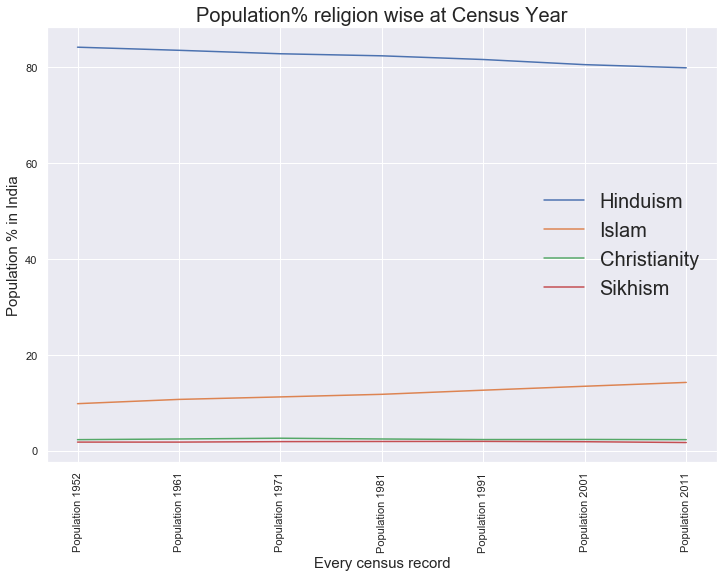

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df2['Hinduism'], label='Hinduism')
plt.plot(df2['Islam'], label='Islam')
plt.plot(df2['Christianity'], label='Christianity')
plt.plot(df2['Sikhism'], label='Sikhism')

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.xlabel('Every census record', fontsize=15)
plt.ylabel('Population % in India', fontsize=15)
plt.title('Population% religion wise at Census Year', fontsize=20)
plt.legend(frameon=False, fontsize=20)

In [32]:
data_bihar.drop('State / UT', inplace=True, axis=1)
data_maharashtra.drop('State / UT', inplace=True, axis=1)
data_up.drop('State / UT', inplace=True, axis=1)

In [36]:
df3 = data_bihar[['Religious Communities', 'Persons']]
df3.rename(columns = {'Persons': 'Bihar'}, inplace=True)
result = pd.merge(left =df3, right = data_up, on='Religious Communities')
result.drop(['Males', 'Females'], inplace=True, axis=1)
result

,Religious Communities,Bihar,Persons
0,All Religious Communities,"82,998,509","166,197,921"
1,Hindu,"69,076,919","133,979,263"
2,Muslim,"13,722,048","30,740,158"
3,Christian,"53,137","212,578"
4,Sikh,"20,780","678,059"
5,Buddhist,"18,818","302,031"
6,Jain,"16,085","207,111"
7,Other Religious Communities,"52,905","9,281"


In [37]:
result.rename(columns = {'Persons': 'UP'}, inplace=True)

In [38]:
data_result = pd.merge(left=result, right=data_maharashtra, on='Religious Communities')
data_result.rename(columns = {'Persons': 'Maharashtra'}, inplace=True)
data_result.drop(['Males', 'Females'], axis=1, inplace=True)

In [39]:
data_result

,Religious Communities,Bihar,UP,Maharashtra
0,All Religious Communities,"82,998,509","166,197,921","96,878,627"
1,Hindu,"69,076,919","133,979,263","77,859,385"
2,Muslim,"13,722,048","30,740,158","10,270,485"
3,Christian,"53,137","212,578","1,058,313"
4,Sikh,"20,780","678,059","215,337"
5,Buddhist,"18,818","302,031","5,838,710"
6,Jain,"16,085","207,111","1,301,843"
7,Other Religious Communities,"52,905","9,281","236,841"


In [41]:
data_result.dtypes

Religious Communities    object
Bihar                    object
UP                       object
Maharashtra              object
dtype: object

In [42]:
data_result['Bihar'] = data_result['Bihar'].str.replace(',','').astype('float')
data_result['UP'] = data_result['UP'].str.replace(',','').astype('float')
data_result['Maharashtra'] = data_result['Maharashtra'].str.replace(',','').astype('float')

In [43]:
final_data = data_result.copy()
final_data.set_index(['Religious Communities'], inplace=True)

In [44]:
final_data

,Bihar,UP,Maharashtra
Religious Communities,,,
All Religious Communities,82998509.0,166197921.0,96878627.0
Hindu,69076919.0,133979263.0,77859385.0
Muslim,13722048.0,30740158.0,10270485.0
Christian,53137.0,212578.0,1058313.0
Sikh,20780.0,678059.0,215337.0
Buddhist,18818.0,302031.0,5838710.0
Jain,16085.0,207111.0,1301843.0
Other Religious Communities,52905.0,9281.0,236841.0


In [45]:
final_data = final_data.iloc[0:4, :]

<Figure size 1152x864 with 0 Axes>

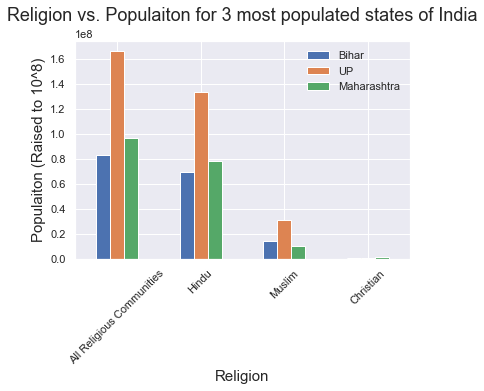

In [46]:
plt.figure(figsize=(16,12))
final_data.plot(kind='bar')
plt.xlabel('Religion',fontsize=15)
plt.ylabel('Populaiton (Raised to 10^8)', fontsize=15)
plt.legend(frameon=False)
plt.title('Religion vs. Populaiton for 3 most populated states of India', fontsize=18, pad=20)
x1 = plt.gca().xaxis
for item in x1.get_ticklabels():
    item.set_rotation(45)

In [50]:
df1.rename(columns={'Population 1952':'1952','Population 1961':'1961','Population 1971':'1971','Population 1981':'1981','Population 1991':'1991','Population 2001':'2001','Population 2011':'2011'}, inplace=True)

In [51]:
df1

,1952,1961,1971,1981,1991,2001,2011
Religion,,,,,,,
Hinduism,84.10,83.45,82.73,82.30,81.53,80.46,79.80
Islam,9.80,10.69,11.21,11.75,12.61,13.43,14.23
Christianity,2.30,2.44,2.60,2.44,2.32,2.34,2.30
Sikhism,1.79,1.79,1.89,1.92,1.94,1.87,1.70
Buddhism,0.74,0.74,0.70,0.70,0.77,0.77,0.70
Jainism,0.46,0.46,0.48,0.47,0.40,0.41,0.37
Others,0.43,0.43,0.41,0.42,0.44,0.72,0.90


In [52]:
df2 = df1.transpose()

In [53]:
df2

Religion,Hinduism,Islam,Christianity,Sikhism,Buddhism,Jainism,Others
1952,84.10,9.80,2.30,1.79,0.74,0.46,0.43
1961,83.45,10.69,2.44,1.79,0.74,0.46,0.43
1971,82.73,11.21,2.60,1.89,0.70,0.48,0.41
1981,82.30,11.75,2.44,1.92,0.70,0.47,0.42
1991,81.53,12.61,2.32,1.94,0.77,0.40,0.44
2001,80.46,13.43,2.34,1.87,0.77,0.41,0.72
2011,79.80,14.23,2.30,1.70,0.70,0.37,0.90


In [56]:
df2.index = pd.to_datetime(df2.index)

In [57]:
df2.dtypes

Religion
Hinduism        float64
Islam           float64
Christianity    float64
Sikhism         float64
Buddhism        float64
Jainism         float64
Others          float64
dtype: object

In [58]:
df2

Religion,Hinduism,Islam,Christianity,Sikhism,Buddhism,Jainism,Others
1952-01-01,84.10,9.80,2.30,1.79,0.74,0.46,0.43
1961-01-01,83.45,10.69,2.44,1.79,0.74,0.46,0.43
1971-01-01,82.73,11.21,2.60,1.89,0.70,0.48,0.41
1981-01-01,82.30,11.75,2.44,1.92,0.70,0.47,0.42
1991-01-01,81.53,12.61,2.32,1.94,0.77,0.40,0.44
2001-01-01,80.46,13.43,2.34,1.87,0.77,0.41,0.72
2011-01-01,79.80,14.23,2.30,1.70,0.70,0.37,0.90


In [63]:
current = df2.tail(1)
current

Religion,Hinduism,Islam,Christianity,Sikhism,Buddhism,Jainism,Others
2011-01-01,79.8,14.23,2.3,1.7,0.7,0.37,0.9


<Figure size 1008x720 with 0 Axes>

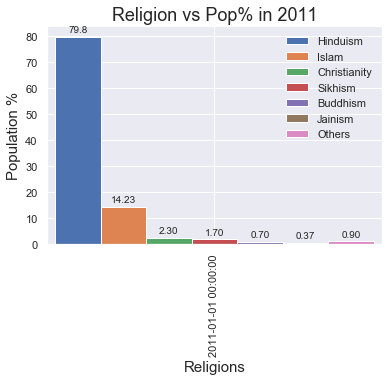

In [82]:
plt.figure(figsize=(14,10))
ax = current.plot(kind='bar', width=10)
ax.set_xlabel('Religions', fontsize=15)
ax.set_ylabel('Population %', fontsize=15)
ax.set_title('Religion vs Pop% in 2011', fontsize=18)
plt.legend(frameon=False)
x2 = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(180)
rects = ax.patches
labels = ['79.8', '14.23', '2.30', '1.70', '0.70', '0.37', '0.90']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +1, label,
            ha='center', va='bottom')

In [85]:
dict_hindu = {'Religion' : 'Hinduism', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':[84.1, 83.45, 82.73, 82.3, 81.53, 80.46, 79.8]}
df_hindu = pd.DataFrame(data=dict_hindu)
df_hindu

,Religion,Year,Population(%)
0,Hinduism,1952,84.10
1,Hinduism,1961,83.45
2,Hinduism,1971,82.73
3,Hinduism,1981,82.30
4,Hinduism,1991,81.53
5,Hinduism,2001,80.46
6,Hinduism,2011,79.80


In [88]:
list(df2['Jainism'])

[0.46, 0.46, 0.48, 0.47, 0.4, 0.41, 0.37]

In [89]:
dict_buddhism = {'Religion' : 'Buddhism', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':[0.74, 0.74, 0.7, 0.7, 0.77, 0.77, 0.7]}
df_buddhism = pd.DataFrame(data=dict_buddhism)
dict_islam = {'Religion' : 'Islam', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':[9.8, 10.69, 11.21, 11.75, 12.61, 13.43, 14.23]}
df_islam = pd.DataFrame(data=dict_islam)
dict_jain = {'Religion' : 'Jainism', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':[0.46, 0.46, 0.48, 0.47, 0.4, 0.41, 0.37]}
df_jain = pd.DataFrame(data=dict_jain)
dict_sikh = {'Religion' : 'Sikhism', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':list(df2['Sikhism'])}
df_sikh = pd.DataFrame(data=dict_sikh)


In [92]:
df_sikh.dtypes

Religion          object
Year               int64
Population(%)    float64
dtype: object

In [91]:
dict_others = {'Religion' : 'Others', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':list(df2['Others'])}
df_others = pd.DataFrame(data=dict_others)
dict_shrist = {'Religion' : 'Christianity', 'Year': [1952,1961,1971,1981,1991,2001,2011], 'Population(%)':list(df2['Christianity'])}
df_christ = pd.DataFrame(data=dict_shrist)

In [95]:
all_dfs=[df_islam, df_hindu, df_christ, df_others, df_jain, df_sikh, df_buddhism]
anime = pd.concat(all_dfs).reset_index(drop=True)
anime = anime.sort_values(by='Year')

In [99]:
anime.reset_index(drop=True, inplace=True)

In [100]:
anime

,Religion,Year,Population(%)
0,Islam,1952,9.80
1,Others,1952,0.43
2,Jainism,1952,0.46
3,Buddhism,1952,0.74
4,Hinduism,1952,84.10
5,Sikhism,1952,1.79
6,Christianity,1952,2.30
7,Islam,1961,10.69
8,Jainism,1961,0.46
9,Buddhism,1961,0.74


In [104]:
colors = dict(zip(
    ['Hinduism', 'Islam', 'Buddhism', 'Jainism','Christianity', 'Sikhism', 'Others'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381','#aafbff', '#f7bb5f', '#eafb50']))

In [131]:
colors1 = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381','#aafbff', '#f7bb5f', '#eafb50']

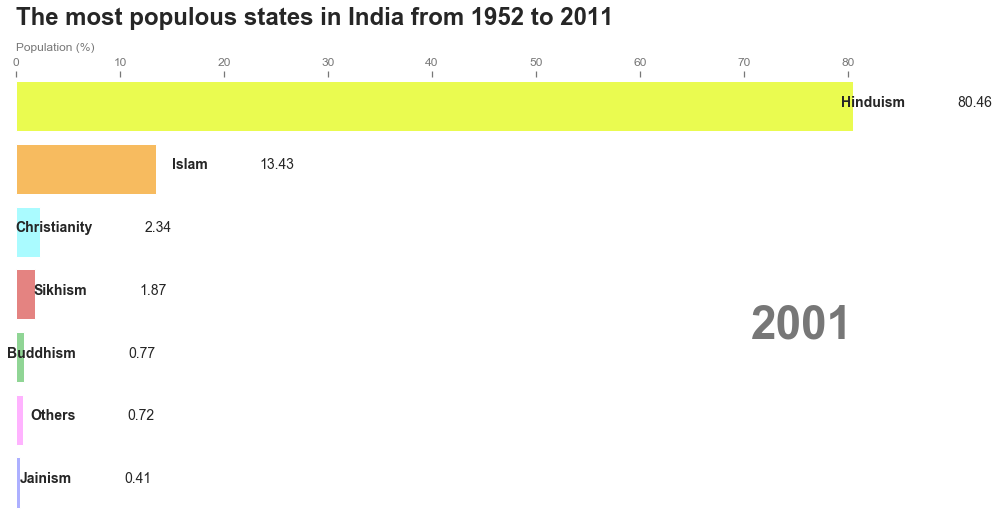

In [169]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = anime[anime['Year'].eq(year)].sort_values(by='Population(%)', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Religion'], dff['Population(%)'], color=colors1)
    dx = dff['Population(%)'].max()
    for i, (pop, religion) in enumerate(zip(dff['Population(%)'], dff['Religion'])):
        ax.text(pop+5, i, religion, size=14, weight=600, ha='right')
        ax.text(pop+10, i, pop, size=14, ha='left')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46,ha='right', weight=800)
    ax.text(0, 1.06, 'Population (%)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous states in India from 1952 to 2011',
          transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
draw_barchart(2001)

In [119]:
import matplotlib.ticker as ticker

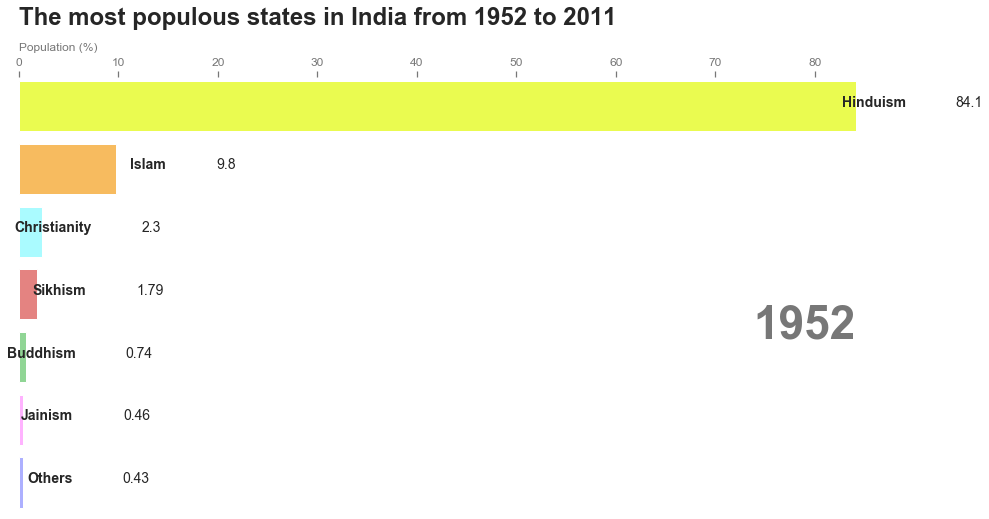

In [170]:
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=[1952, 1961, 1971, 1981, 1991, 2001, 2011], interval=200)
HTML(animator.to_jshtml()) 
